# 1. IMPORTING LIBRARIES

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [40]:
df=pd.read_csv("titanic.csv")

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# 2. Descriptive Analysis

In [11]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df.select_dtypes(include='number').mean()

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [42]:
df.select_dtypes(include='number').median()

survived     0.0000
pclass       3.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
dtype: float64

In [43]:
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


In [44]:
df.select_dtypes(include='number').var()

survived       0.236772
pclass         0.699015
age          211.019125
sibsp          1.216043
parch          0.649728
fare        2469.436846
dtype: float64

In [45]:
df.select_dtypes(include='number').std()

survived     0.486592
pclass       0.836071
age         14.526497
sibsp        1.102743
parch        0.806057
fare        49.693429
dtype: float64

# 3. Null Values

In [46]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [47]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [70]:
# Here we have 688 null values for deck column out of 891 records having this much NA values and using the column is useless so we'll drop the deck column

df = df.drop(columns=['deck'])
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [71]:
df['age'].isna().any()

False

In [73]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [75]:
# incase age column has missing values we use below code
df['age'].fillna(df['age'].mean(),inplace=True)

In [77]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [78]:
df.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town     True
alive          False
alone          False
dtype: bool

In [81]:
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [82]:
df.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town    False
alive          False
alone          False
dtype: bool

# 4. Visualization

## Univariate

C:\Users\HP\AppData\Local\Temp\ipykernel_12108\1512872506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


Text(0.5, 1.0, 'Age Distribution plot')

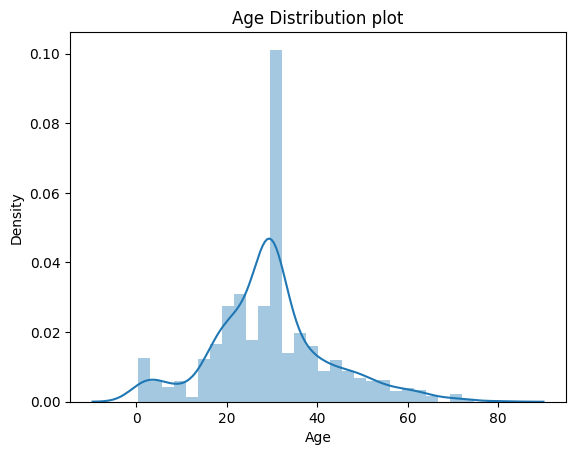

In [83]:

sns.distplot(df['age'])
plt.xlabel("Age")
plt.title("Age Distribution plot")

([<matplotlib.patches.Wedge at 0x2679fe2d750>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

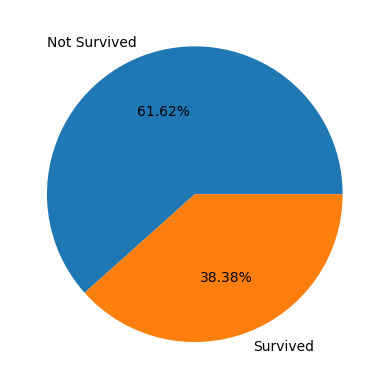

In [84]:
plt.pie(df['survived'].value_counts(),labels=['Not Survived','Survived'],autopct="%.2f%%")

## Bivariate Analysis

<Axes: xlabel='class', ylabel='survived'>

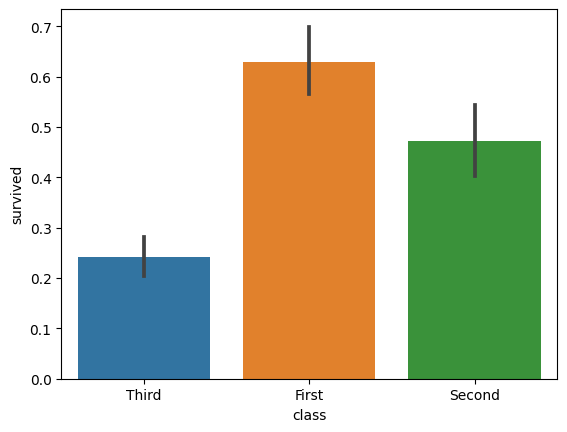

In [85]:
sns.barplot(data=df,x='class',y='survived')

<Axes: xlabel='age', ylabel='fare'>

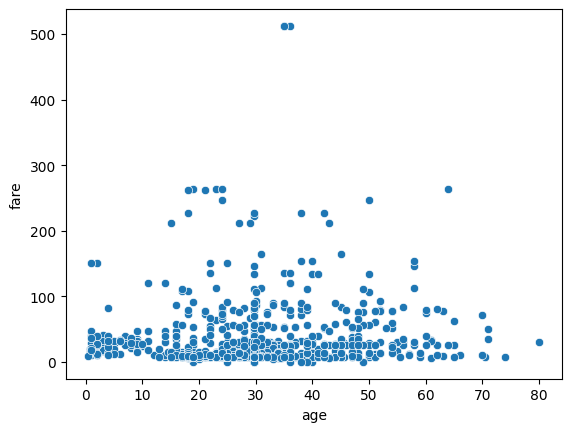

In [86]:
sns.scatterplot(data=df, x='age', y='fare')

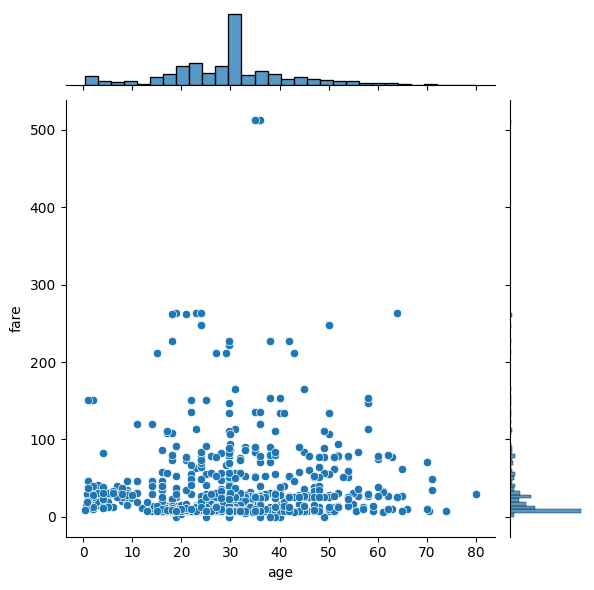

In [87]:
sns.jointplot(data=df,x='age',y='fare')

## Multivariate Analysis

<Axes: >

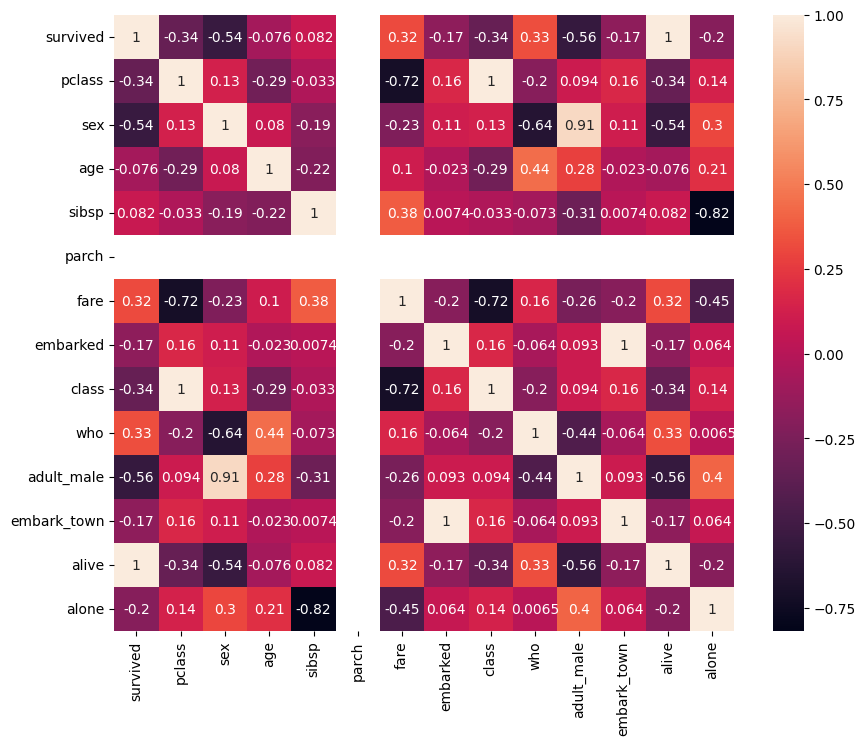

In [142]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


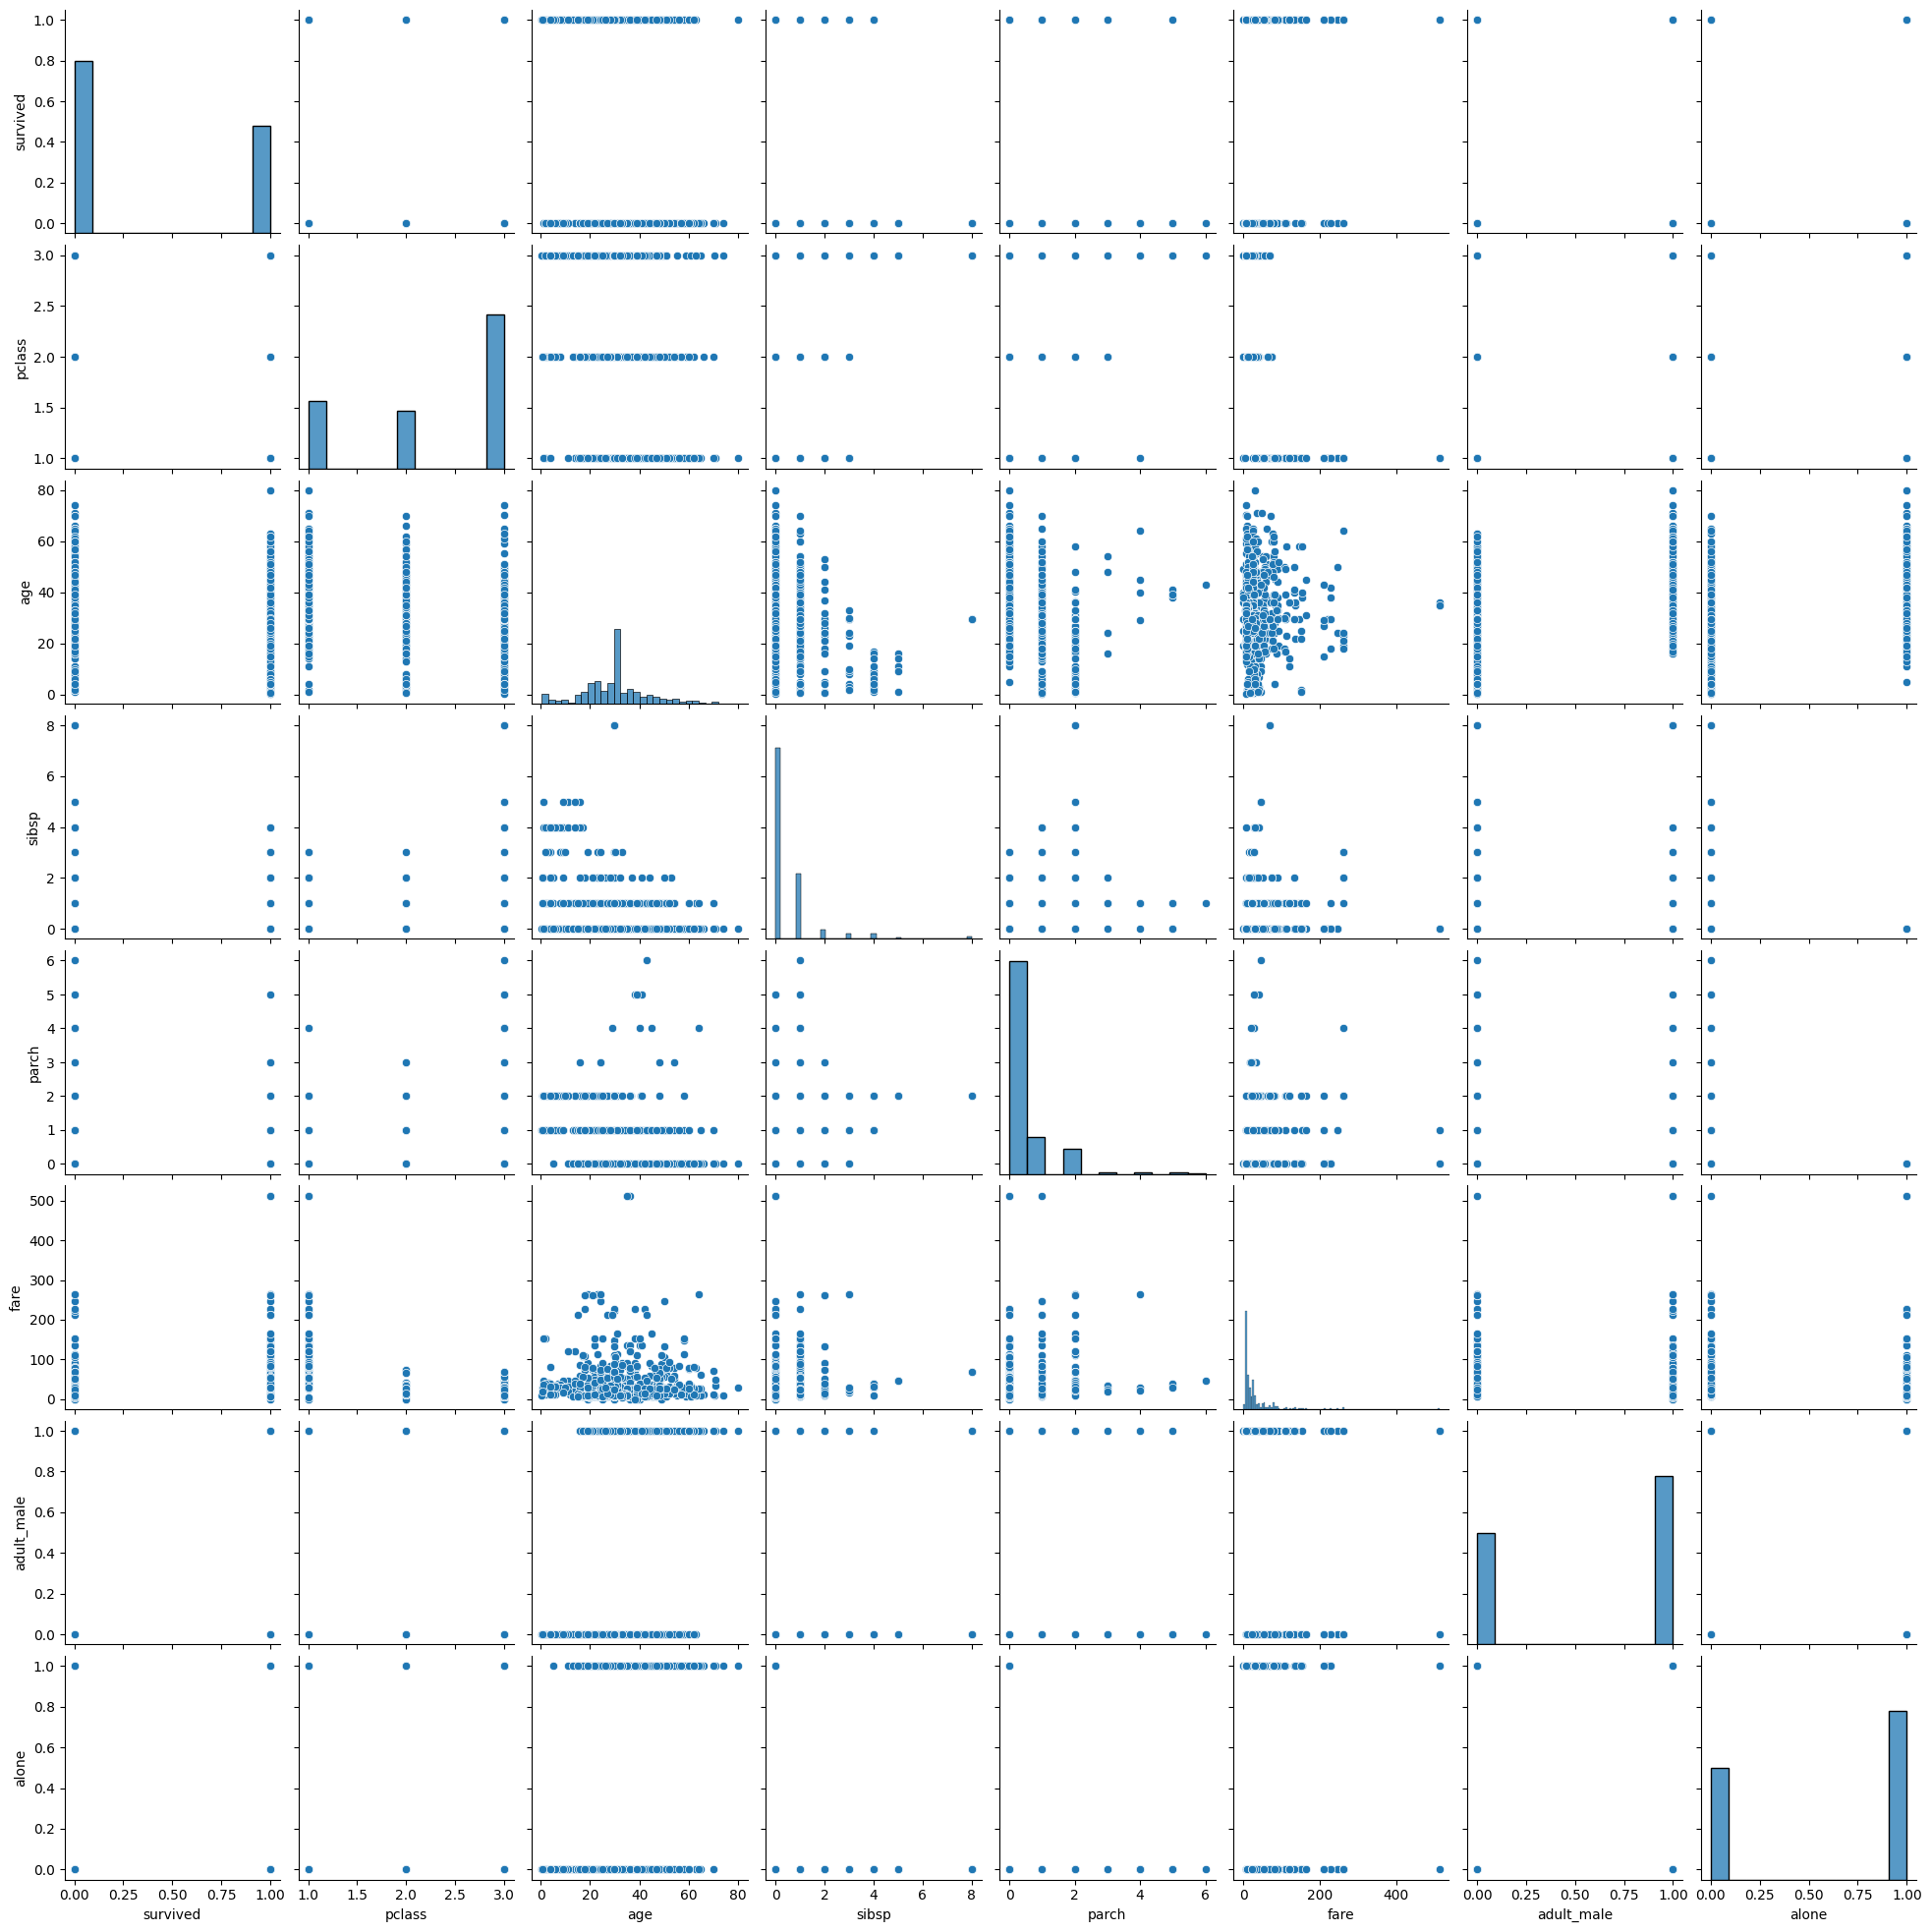

In [89]:
sns.pairplot(df)

# 5. Descriptive Analysis

### We'll take only the numerical columns for the descriptive analysis for some functions so we'll create a new dataframe named df1 containg only numerical columns

In [90]:
df1 = df.drop(columns=['sex','class','embarked','embark_town','who','adult_male','alive','alone'])
df1.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [91]:
df1.mean()

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [92]:
df1.median()

survived     0.000000
pclass       3.000000
age         29.699118
sibsp        0.000000
parch        0.000000
fare        14.454200
dtype: float64

In [93]:
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,29.699118,0,0,8.05,S,Third,man,True,Southampton,no,True


In [94]:
df.max()

survived                 1
pclass                   3
sex                   male
age                   80.0
sibsp                    8
parch                    6
fare              512.3292
embarked                 S
class                Third
who                  woman
adult_male            True
embark_town    Southampton
alive                  yes
alone                 True
dtype: object

In [95]:
df.min()

survived               0
pclass                 1
sex               female
age                 0.42
sibsp                  0
parch                  0
fare                 0.0
embarked               C
class              First
who                child
adult_male         False
embark_town    Cherbourg
alive                 no
alone              False
dtype: object

In [98]:
df.select_dtypes(include='number').var()

survived       0.236772
pclass         0.699015
age          169.052400
sibsp          1.216043
parch          0.649728
fare        2469.436846
dtype: float64

In [99]:
df.select_dtypes(include='number').std()

survived     0.486592
pclass       0.836071
age         13.002015
sibsp        1.102743
parch        0.806057
fare        49.693429
dtype: float64

In [100]:
quantile = df1.quantile(q=[0.25,0.75])
quantile

,survived,pclass,age,sibsp,parch,fare
0.25,0.0,2.0,22.0,0.0,0.0,7.9104
0.75,1.0,3.0,35.0,1.0,0.0,31.0000


In [101]:
IQR = quantile.iloc[1]-quantile.iloc[0]

In [102]:
upper_extreme = quantile.iloc[1]+(1.5*IQR)
upper_extreme

survived     2.5000
pclass       4.5000
age         54.5000
sibsp        2.5000
parch        0.0000
fare        65.6344
dtype: float64

In [103]:
lower_extreme = quantile.iloc[0]-(1.5*IQR)
lower_extreme

survived    -1.500
pclass       0.500
age          2.500
sibsp       -1.500
parch        0.000
fare       -26.724
dtype: float64

In [106]:
df.select_dtypes(include='number').skew()

survived    0.478523
pclass     -0.630548
age         0.434488
sibsp       3.695352
parch       2.749117
fare        4.787317
dtype: float64

In [108]:
df.select_dtypes(include='number').kurt()

survived    -1.775005
pclass      -1.280015
age          0.966279
sibsp       17.880420
parch        9.778125
fare        33.398141
dtype: float64

In [109]:
df.select_dtypes(include='number').corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [110]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [111]:
df['alive'].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

# 6. Outliers

<Axes: >

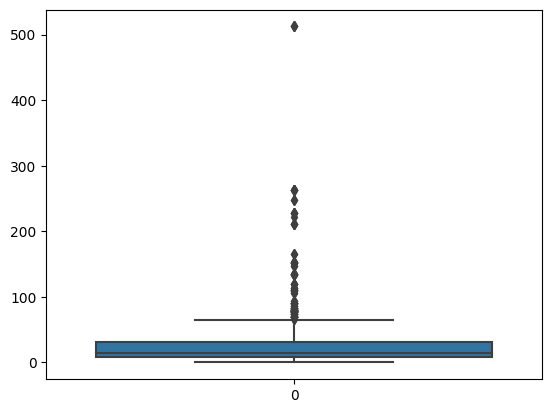

In [112]:
sns.boxplot(df['fare'])

In [113]:
# We'll replce the outliers value with upper_extreme when value > upper_extreme
# We'll replce the outliers value with lower_extreme when value < lower_extreme 

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
l_e = Q1 -(1.5*IQR)
u_e = Q3 + (1.5*IQR)
df['fare']=np.where(df['fare']>u_e,u_e,np.where(df['fare']<l_e,l_e,df['fare']))

<Axes: >

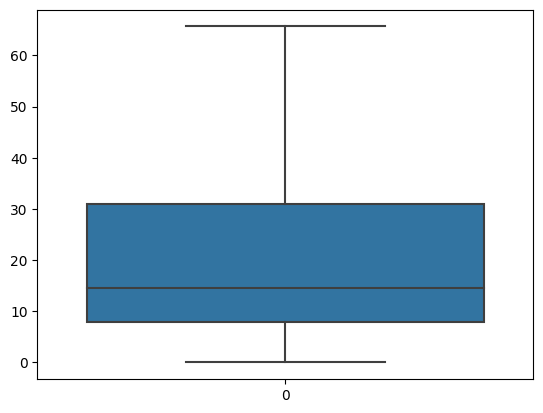

In [114]:
sns.boxplot(df['fare'])

<Axes: >

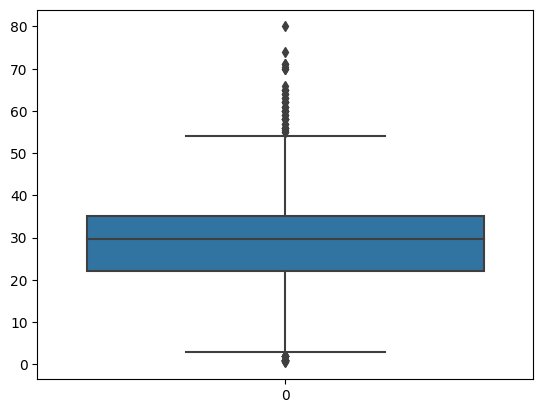

In [115]:
sns.boxplot(df['age'])

In [116]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['age'] = np.where(df['age']>u_e,u_e,np.where(df['age']<l_e,l_e,df['age']))

<Axes: >

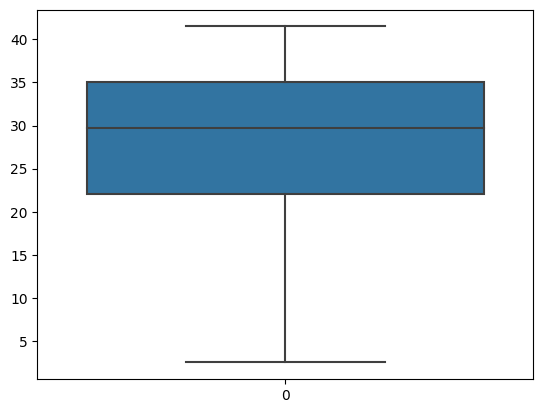

In [117]:
sns.boxplot(df['age'])

<Axes: >

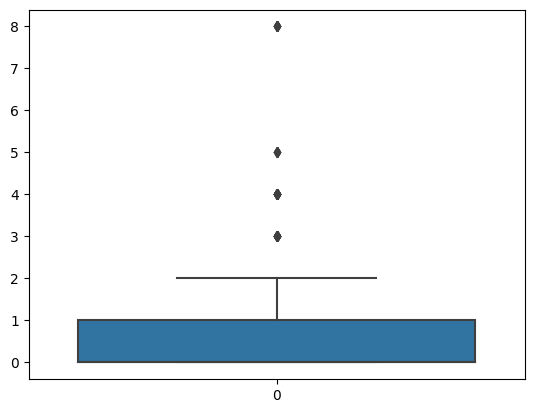

In [118]:
sns.boxplot(df['sibsp'])

In [119]:
Q1 = df['sibsp'].quantile(0.25)
Q3 = df['sibsp'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['sibsp'] = np.where(df['sibsp']>u_e,u_e,np.where(df['sibsp']<l_e,l_e,df['sibsp']))

<Axes: >

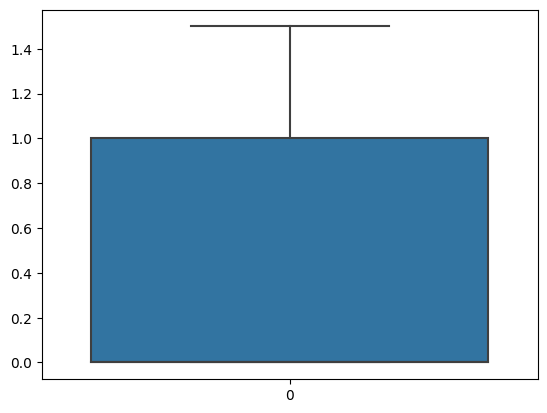

In [120]:
sns.boxplot(df['sibsp'])

<Axes: >

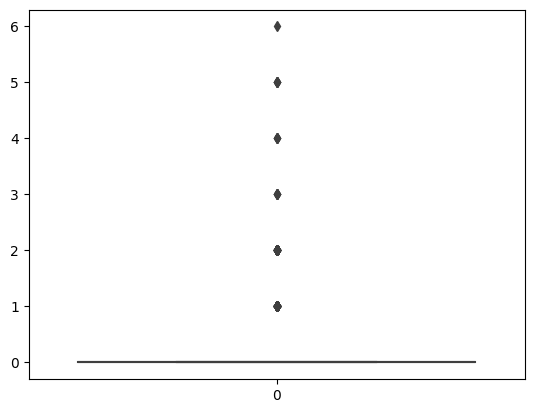

In [121]:
sns.boxplot(df['parch'])

In [122]:
Q1 = df['parch'].quantile(0.25)
Q3 = df['parch'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['parch'] = np.where(df['parch']>u_e,u_e,np.where(df['parch']<l_e,l_e,df['parch']))

<Axes: >

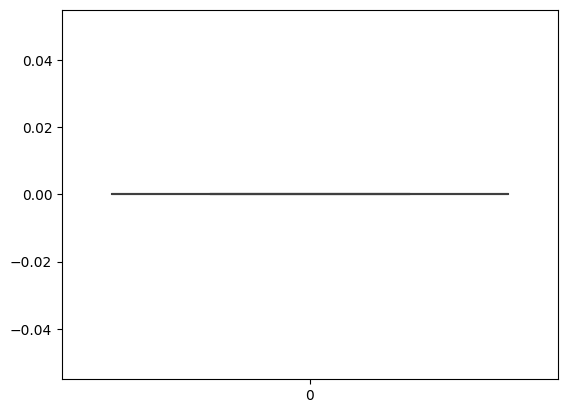

In [123]:
sns.boxplot(df['parch'])

<Axes: >

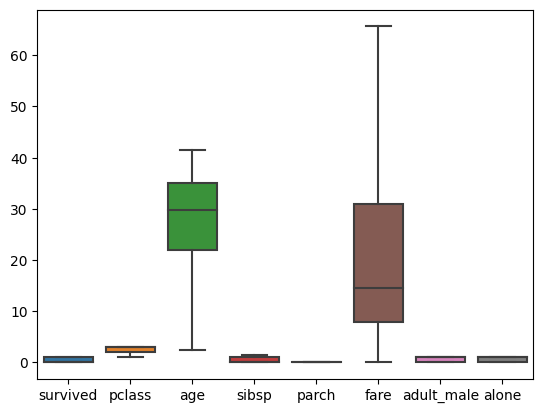

In [124]:
sns.boxplot(df)  #No more outliers

# 7. Encoding

In [127]:
LE = LabelEncoder()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    float64
 5   parch        891 non-null    float64
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(4), int64(2), object(6)
memory usage: 85.4+ KB


In [129]:
df['sex'] = LE.fit_transform(df['sex'])
df['embarked'] = LE.fit_transform(df['embarked'])
df['class'] = LE.fit_transform(df['class'])
df['who'] = LE.fit_transform(df['who'])
df['embark_town'] = LE.fit_transform(df['embark_town'])
df['alive'] = LE.fit_transform(df['alive'])
df['adult_male'] = LE.fit_transform(df['adult_male'])
df['alone'] = LE.fit_transform(df['alone'])

In [131]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1.0,0.0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1.0,0.0,65.6344,0,0,2,0,0,1,0
2,1,3,0,26.0,0.0,0.0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1.0,0.0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0.0,0.0,8.0500,2,2,1,1,2,0,1


# 8. Splitting into dependent and independent variables

###  Here our main goal is to find whether the people survived or not and that is our target variable(y) so y is survived and x is rest

In [132]:
y = df['survived']
x = df.drop(columns=['survived'])

In [133]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.0,1.0,0.0,7.2500,2,2,1,1,2,0,0
1,1,0,38.0,1.0,0.0,65.6344,0,0,2,0,0,1,0
2,3,0,26.0,0.0,0.0,7.9250,2,2,2,0,2,1,1
3,1,0,35.0,1.0,0.0,53.1000,2,0,2,0,2,1,0
4,3,1,35.0,0.0,0.0,8.0500,2,2,1,1,2,0,1


In [134]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

# 9. Scaling

In [135]:
name = x.columns
SS = StandardScaler()
z = SS.fit_transform(x)
x = pd.DataFrame(z,columns=name)
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0.827377,0.737695,-0.611782,1.185039,0.0,-0.820552,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,-1.231645
1,-1.566107,-1.355574,0.989167,1.185039,0.0,2.031623,-1.942303,-1.566107,1.328379,-1.231645,-1.942303,1.266990,-1.231645
2,0.827377,-1.355574,-0.211544,-0.664120,0.0,-0.787578,0.585954,0.827377,1.328379,-1.231645,0.585954,1.266990,0.811922
3,-1.566107,-1.355574,0.688989,1.185039,0.0,1.419297,0.585954,-1.566107,1.328379,-1.231645,0.585954,1.266990,-1.231645
4,0.827377,0.737695,0.688989,-0.664120,0.0,-0.781471,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,0.811922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.111485,-0.664120,0.0,-0.539655,0.585954,-0.369365,-0.355242,0.811922,0.585954,-0.789272,0.811922
887,-1.566107,-1.355574,-0.911960,-0.664120,0.0,0.290823,0.585954,-1.566107,1.328379,-1.231645,0.585954,1.266990,0.811922
888,0.827377,-1.355574,0.158587,1.185039,0.0,-0.029155,0.585954,0.827377,1.328379,-1.231645,0.585954,-0.789272,-1.231645
889,-1.566107,0.737695,-0.211544,-0.664120,0.0,0.290823,-1.942303,-1.566107,-0.355242,0.811922,-1.942303,1.266990,0.811922


# 10. Train test spit

In [136]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [137]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
140,0.827377,-1.355574,0.158587,-0.664120,0.0,-0.429944,-1.942303,0.827377,1.328379,-1.231645,-1.942303,-0.789272,-1.231645
439,-0.369365,0.737695,0.288752,-0.664120,0.0,-0.661785,0.585954,-0.369365,-0.355242,0.811922,0.585954,-0.789272,0.811922
817,-0.369365,0.737695,0.288752,1.185039,0.0,0.632990,-1.942303,-0.369365,-0.355242,0.811922,-1.942303,-0.789272,-1.231645
378,0.827377,0.737695,-0.811900,-0.664120,0.0,-0.978710,-1.942303,0.827377,-0.355242,0.811922,-1.942303,-0.789272,0.811922
491,0.827377,0.737695,-0.711841,-0.664120,0.0,-0.820552,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,0.811922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-1.566107,-1.355574,1.089227,1.185039,0.0,2.031623,-1.942303,-1.566107,1.328379,-1.231645,-1.942303,1.266990,-1.231645
192,0.827377,-1.355574,-0.911960,1.185039,0.0,-0.791036,0.585954,0.827377,1.328379,-1.231645,0.585954,1.266990,-1.231645
629,0.827377,0.737695,0.158587,-0.664120,0.0,-0.796942,-0.678175,0.827377,-0.355242,0.811922,-0.678175,-0.789272,0.811922
559,0.827377,-1.355574,0.789049,1.185039,0.0,-0.324708,0.585954,0.827377,1.328379,-1.231645,0.585954,1.266990,-1.231645


In [138]:
x_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
495,0.827377,0.737695,0.158587,-0.664120,0.0,-0.468415,-1.942303,0.827377,-0.355242,0.811922,-1.942303,-0.789272,0.811922
648,0.827377,0.737695,0.158587,-0.664120,0.0,-0.805897,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,0.811922
278,0.827377,0.737695,-2.112672,2.109618,0.0,0.248078,-0.678175,0.827377,-2.038863,-1.231645,-0.678175,-0.789272,-1.231645
31,-1.566107,-1.355574,0.158587,1.185039,0.0,2.031623,-1.942303,-1.566107,1.328379,-1.231645,-1.942303,1.266990,-1.231645
255,0.827377,-1.355574,0.088633,-0.664120,0.0,-0.429944,-1.942303,0.827377,1.328379,-1.231645,-1.942303,1.266990,-1.231645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.827377,-1.355574,-1.512316,-0.664120,0.0,-0.821569,-1.942303,0.827377,-2.038863,-1.231645,-1.942303,1.266990,0.811922
837,0.827377,0.737695,0.158587,-0.664120,0.0,-0.781471,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,0.811922
215,-1.566107,-1.355574,0.288752,1.185039,0.0,2.031623,-1.942303,-1.566107,1.328379,-1.231645,-1.942303,1.266990,-1.231645
833,0.827377,0.737695,-0.511722,-0.664120,0.0,-0.791036,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,0.811922


In [139]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: survived, Length: 712, dtype: int64

In [140]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: survived, Length: 179, dtype: int64